In [1]:
import pandas as pd
import json

PLAYTIME_THRESHOLD = 10

def convert_game(game: object) -> pd.Series:
    game = pd.json_normalize(game)
    game["playtime_forever"] = game["playtime_forever"].apply(lambda p: p / 60)
    game = game.where(lambda p: p["playtime_forever"] > PLAYTIME_THRESHOLD).dropna()
    return game

games = pd.read_json("games.json")
games["games"] = games["games"].apply(convert_game)
games["games"][0]

,appid,playtime_forever
3,218620.0,10.800000
10,730.0,688.800000
13,470220.0,16.400000
15,360430.0,33.183333
16,289070.0,28.483333
20,252950.0,2871.683333
22,578080.0,199.066667
25,695290.0,136.433333
41,1089350.0,64.366667


In [2]:
def convert_game_info(gi):
    gi["appid"] = gi["game_info"]["steam_appid"]
    gi["name"] = gi["game_info"]["name"]
    if gi["game_info"]["genres"] is None:
        gi["game_info"]["genres"] = []
    gi["genres"] = list(map(lambda g: g["description"], gi["game_info"]["genres"]))
    if len(gi["reviews"]) > 0:
        gi["reviews"] = round(float(gi["reviews"][0]["weighted_vote_score"]), ndigits=2)
    else:
        return None
    return gi

game_info = pd.read_json("game_info.json")
game_info = game_info.apply(convert_game_info, axis=1)
game_info

,game_info,reviews,review_summary,appid,name,genres
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]"
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay..."
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[]
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action]
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]"
...,...,...,...,...,...,...
15821,"{'name': 'The Wind Road 紫塞秋风', 'steam_appid': ...",0.55,"{'review_score': 8.0, 'total_positive': 52, 't...",1264670.0,The Wind Road 紫塞秋风,"[Action, Adventure, Indie, RPG]"
15822,{'name': 'Stifled - Echolocation Horror Myster...,0.59,"{'review_score': 6.0, 'total_positive': 14, 't...",514830.0,Stifled - Echolocation Horror Mystery,"[Action, Adventure, Indie, Simulation]"
15823,"{'name': 'Shoot 1UP', 'steam_appid': 373610, '...",0.62,"{'review_score': 7.0, 'total_positive': 41, 't...",373610.0,Shoot 1UP,"[Action, Indie]"
15824,{'name': 'State of War : Warmonger / 蓝色警戒 (Cla...,0.54,"{'review_score': 8.0, 'total_positive': 51, 't...",748040.0,State of War : Warmonger / 蓝色警戒 (Classic 2000),"[Action, Strategy]"


In [3]:
def convert_to_percentage(game_time):
    total_playtime = sum(game_time)
    playtime_percentages = []
    for playtime in game_time:
        playtime_to_percent = (playtime / total_playtime) * 100
        playtime_percentages.append(playtime_to_percent)
    return playtime_percentages

for i in range(len(games["games"])):
    games["games"][i]["playtime_forever"] = convert_to_percentage(games["games"][i]["playtime_forever"])

In [4]:
all_genres = set()
for app_genre_list in game_info['genres']:
    if app_genre_list is not None:
        for genre in app_genre_list:
            all_genres.add(genre)
print(all_genres)

{'Design & Illustration', 'Massively Multiplayer', 'Episodic', 'Audio Production', 'Casual', 'Animation & Modeling', 'Adventure', 'Early Access', 'Software Training', 'Free to Play', 'Action', 'Tutorial', 'Nudity', 'RPG', 'Short', 'Game Development', 'Education', 'Racing', 'Movie', 'Sports', 'Indie', 'Simulation', 'Video Production', 'Gore', 'Accounting', 'Utilities', 'Violent', 'Documentary', 'Photo Editing', 'Strategy', 'Sexual Content', 'Web Publishing'}


In [5]:
game_info.head()

,game_info,reviews,review_summary,appid,name,genres
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]"
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay..."
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[]
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action]
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]"


In [6]:
print(game_info["appid"][1], game_info["name"][1], game_info["genres"][1])

252490.0 Rust ['Action', 'Adventure', 'Indie', 'Massively Multiplayer', 'RPG']


In [7]:
# Given the appid of a game, we will get its associated genre
def genre_from_appid(appid):
    indices = game_info[game_info["appid"]==appid].index.values
    if len(indices) == 0:
        return []
    return game_info["genres"][indices[0]]
# print(genre_from_appid(252490.0))


In [8]:
print(games["games"][0]["playtime_forever"], games["games"][0]["appid"])

3      0.266718
10    17.010698
13     0.405017
15     0.819500
16     0.703428
20    70.919478
22     4.916177
25     3.369376
41     1.589608
Name: playtime_forever, dtype: float64 3      218620.0
10        730.0
13     470220.0
15     360430.0
16     289070.0
20     252950.0
22     578080.0
25     695290.0
41    1089350.0
Name: appid, dtype: float64


In [9]:
# want to create a dictionary then have it be a column in games df
genre_dict = {}
for genre in list(all_genres):
    genre_dict[genre] = 0

player_list = []
for player in games["player"]:
    player_list.append(genre_dict.copy())

# print(player_list)
games["genre_mapping"] = player_list
print(games["genre_mapping"][0])


{'Design & Illustration': 0, 'Massively Multiplayer': 0, 'Episodic': 0, 'Audio Production': 0, 'Casual': 0, 'Animation & Modeling': 0, 'Adventure': 0, 'Early Access': 0, 'Software Training': 0, 'Free to Play': 0, 'Action': 0, 'Tutorial': 0, 'Nudity': 0, 'RPG': 0, 'Short': 0, 'Game Development': 0, 'Education': 0, 'Racing': 0, 'Movie': 0, 'Sports': 0, 'Indie': 0, 'Simulation': 0, 'Video Production': 0, 'Gore': 0, 'Accounting': 0, 'Utilities': 0, 'Violent': 0, 'Documentary': 0, 'Photo Editing': 0, 'Strategy': 0, 'Sexual Content': 0, 'Web Publishing': 0}


In [10]:
def getplaytime(appid, player):
    player_rec = games["games"][player]
    indices = player_rec.index[abs(player_rec["appid"] - appid) < 1e-6]
    if len(indices) == 0:
        return 0
    return player_rec["playtime_forever"][indices.values[0]]
    

In [11]:
# print(games["games"][0])

for player, players_game in enumerate(games["games"]):
    # print(players_game)
    for i, appid in enumerate(players_game["appid"]):
        # print(appid, genre_from_appid(appid))
        for genre in genre_from_appid(appid):
            # get players playtime forever for that appid
            games["genre_mapping"][player][genre] += getplaytime(appid, player)
        # print(games["genre_mapping"][0])
    

In [12]:
favorite_genre = []
favorite_genre_playtime = []
total_playtime = []
for genre_dict in games["genre_mapping"]:
    total_time = sum(genre_dict.values())
    max_key = max(genre_dict, key=genre_dict.get)
    favorite_genre_playtime.append(genre_dict[max_key])
    favorite_genre.append(max_key)
    total_playtime.append(total_time)

In [13]:
games_copy = games.copy()

In [14]:
games_copy["favorite_genre"] = favorite_genre
games_copy["favorite_genre_playtime"] = favorite_genre_playtime
games_copy["total_playtime"] = total_playtime
games_copy = games_copy[games_copy["favorite_genre_playtime"] != 0]

In [89]:
games_copy

,player,games,genre_mapping,favorite_genre,favorite_genre_playtime,total_playtime
0,76561198039775104,appid playtime_forever 3 218620.0 ...,"{'Action': 93.93257132037884, 'Video Productio...",Action,93.932571,352.385441
1,76561198024123792,appid playtime_forever 0 300....,"{'Action': 64.20982762598196, 'Video Productio...",Action,64.209828,219.258618
2,76561198011515104,appid playtime_forever 0 4000....,"{'Action': 57.204293853168245, 'Video Producti...",Action,57.204294,272.647231
3,76561197972449504,appid playtime_forever 0 220....,"{'Action': 47.2915985809292, 'Video Production...",Action,47.291599,235.031638
4,76561197968849040,appid playtime_forever 0 10....,"{'Action': 80.62573875286455, 'Video Productio...",Action,80.625739,272.401882
...,...,...,...,...,...,...
12985,76561199064077056,appid playtime_forever 0 730.0 ...,"{'Action': 100.0, 'Video Production': 0, 'Tuto...",Action,100.000000,200.000000
12986,76561199064576224,appid playtime_forever 0 730 ...,"{'Action': 100.0, 'Video Production': 0, 'Tuto...",Action,100.000000,200.000000
12987,76561199075210880,appid playtime_forever 0 730 ...,"{'Action': 100.0, 'Video Production': 0, 'Tuto...",Action,100.000000,206.468476
12988,76561199094462096,appid playtime_forever 0 730 ...,"{'Action': 100.0, 'Video Production': 0, 'Tuto...",Action,100.000000,200.000000


In [15]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
games_copy["favorite_genre"] = le.fit_transform(games_copy["favorite_genre"])
games_copy["player"] = le.fit_transform(games_copy["player"])

In [16]:
clustering_feature = games_copy.iloc[:,3:4]
clustering_feature

,favorite_genre
0,0
1,0
2,0
3,0
4,0
...,...
12985,5
12986,5
12987,0
12988,5


In [17]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
kmeans.fit(clustering_feature)
clusters = kmeans.fit_predict(clustering_feature)

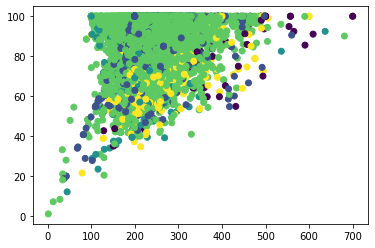

In [18]:
import matplotlib.pyplot as plt
plt.scatter(games_copy["total_playtime"], games_copy["favorite_genre_playtime"], c=clusters)

In the next section we will explore our review and popularity features. 
Questions to explore include, are the most played games, also the ones with the best reviews?

In [29]:
game_info.head()

,game_info,reviews,review_summary,appid,name,genres
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]"
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay..."
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[]
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action]
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]"


Here, I extracted two useful columns for our analysis to not deal with nested dictionaries

In [46]:
review_df = pd.DataFrame()
review_scores = []
total_reviews = []
for review in game_info['review_summary']:
    if review is None:
    # print(review['review_score'] is None)
    # print(review['total_reviews'] is None)
    # if (review['review_score'] is None or review['total_reviews'] is None):
        review_scores.append(0)
        total_reviews.append(0)
    else:
        review_scores.append(review['review_score'])
        total_reviews.append(review['total_reviews'])
# print(len(total_reviews) == len(game_info['review_summary']))
game_info['review_score'] = review_scores
game_info['total_reviews'] = total_reviews
game_info.head()

,game_info,reviews,review_summary,appid,name,genres,review_scores,total_reviews,review_score
0,"{'name': 'Warframe', 'steam_appid': 230410, 'g...",0.52,"{'review_score': 8.0, 'total_positive': 1009, ...",230410.0,Warframe,"[Action, Free to Play]",8.0,1145,8.0
1,"{'name': 'Rust', 'steam_appid': 252490, 'genre...",0.91,"{'review_score': 8.0, 'total_positive': 169918...",252490.0,Rust,"[Action, Adventure, Indie, Massively Multiplay...",8.0,197753,8.0
2,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.52,"{'review_score': 7.0, 'total_positive': 39, 't...",12250.0,Grand Theft Auto: San Andreas,[],7.0,40,7.0
3,"{'name': 'Grand Theft Auto: San Andreas', 'ste...",0.77,"{'review_score': 8.0, 'total_positive': 12549,...",12120.0,Grand Theft Auto: San Andreas,[Action],8.0,14311,8.0
4,"{'name': 'Game Dev Tycoon', 'steam_appid': 239...",0.70,"{'review_score': 8.0, 'total_positive': 16966,...",239820.0,Game Dev Tycoon,"[Casual, Indie, Simulation, Strategy]",8.0,17926,8.0


In [81]:
total_playtime = {}
for game in game_info['appid']:
    total_playtime[game] = 0
# print(total_playtime)
# games['games'][0]
for game in games['games']:
    for appid, playtime in game.iteritems():
        print(str(appid))
        break
    break
        # if appid in total_playtime:
        #     # print(playtime)
        #     total_playtime[appid] += playtime
# print(total_playtime)

appid
